In [1]:
import pandas as pd
import numpy as np
import glob

# get list of file names from directory
directory = 'G:\Datasets\Shares\MOEX'
files = glob.glob(directory + '/*.csv')

# generate list of dataframes from each file (or date) respectively
cl_name = ["ticker", "date", "open", "high", "low", "close", "volume"]
dfs = [pd.read_csv(file, parse_dates = ["date"], index_col = "date")
       for file in files]

# concatenate the dataframes into one temporary dataframe
df_master = pd.concat(dfs)
df_master = df_master.drop('time', axis = 1)

In [2]:
df_master

,open,high,low,close,volume,ticker
date,,,,,,
2020-11-02,902.000,920.000,877.000,899.000,22698,AAL-RM
2020-11-03,900.000,907.000,886.000,894.000,5544,AAL-RM
2020-11-05,895.000,895.000,860.000,892.000,25506,AAL-RM
2020-11-06,887.000,900.000,872.000,888.000,13844,AAL-RM
2020-11-09,900.000,1159.000,892.000,1015.000,95807,AAL-RM
...,...,...,...,...,...,...
2020-12-21,3.965,4.055,3.950,4.055,142000,ZVEZ
2020-12-22,3.985,4.030,3.955,4.005,106000,ZVEZ
2020-12-23,3.975,4.025,3.965,3.985,78000,ZVEZ


In [3]:
# number of tickers in dataframe
print("There are {} tickers with obervations over {} days.".format(df_master.ticker.unique().size, df_master.index.unique().size))

There are 329 tickers with obervations over 3896 days.


In [4]:
df_open = df_master[["ticker", "open"]].pivot_table(index = 'date', columns = "ticker", values = "open")
df_open

ticker,AAL-RM,AAPL-RM,ABBV-RM,ABRD,ABT-RM,ACKO,ADBE-RM,AFKS,AFLT,AGRO,...,WTCMP,XOM-RM,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
date,,,,,,,,,,,,,,,,,,,,,
2007-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.51,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,1199.0,9385.0,7897.0,206.5,8078.0,5.56,37053.0,28.450,70.90,799.6,...,8.36,3101.0,49.70,0.3645,0.3495,5100.0,162.0,88.5,2550.0,3.965
2020-12-22,1204.0,9649.0,7819.0,201.5,8064.0,5.32,37648.0,27.797,67.94,816.8,...,8.22,3103.0,49.50,0.3535,0.3270,5008.8,164.0,89.0,2510.0,3.985
2020-12-23,1140.0,9909.0,7824.0,202.0,8172.0,5.38,38018.0,28.632,68.60,821.0,...,8.32,3110.0,50.05,0.3605,0.3510,5072.2,164.0,90.0,2520.0,3.975


In [5]:
df_master['volume'] = df_master['volume'].astype('int64')

In [6]:
# using pivot function, for each ticker values, individual dataframes for open, high, low, close, and volume can be built
df_open = df_master[["ticker", "open"]].pivot_table(index = 'date',columns = "ticker", values = "open")
df_high = df_master[["ticker", "high"]].pivot_table(index = 'date',columns = "ticker", values = "high")
df_low = df_master[["ticker", "low"]].pivot_table(index = 'date',columns = "ticker", values = "low")
df_close = df_master[["ticker", "close"]].pivot_table(index = 'date',columns = "ticker", values = "close")
df_volume = df_master[["ticker", "volume"]].pivot_table(index = 'date',columns = "ticker", values = "volume")

In [7]:
df_ftr_rtn = (df_close.shift(-1) / df_close) - 1
df_ftr_rtn.head()

ticker,AAL-RM,AAPL-RM,ABBV-RM,ABRD,ABT-RM,ACKO,ADBE-RM,AFKS,AFLT,AGRO,...,WTCMP,XOM-RM,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
date,,,,,,,,,,,,,,,,,,,,,
2007-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001674,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013033,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022346,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023348,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076052,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# to find the future close return of t based on t-1 close values and assign to the index of t
df_rtn = (df_close / df_close.shift(1)) - 1
df_rtn.head()

ticker,AAL-RM,AAPL-RM,ABBV-RM,ABRD,ABT-RM,ACKO,ADBE-RM,AFKS,AFLT,AGRO,...,WTCMP,XOM-RM,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
date,,,,,,,,,,,,,,,,,,,,,
2007-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001674,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013033,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022346,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023348,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# dataframe wirh ratio of high/low for each ticker on each day
df_hl = df_high / df_low
df_hl.head()

ticker,AAL-RM,AAPL-RM,ABBV-RM,ABRD,ABT-RM,ACKO,ADBE-RM,AFKS,AFLT,AGRO,...,WTCMP,XOM-RM,YAKG,YKEN,YKENP,YNDX,YRSB,YRSBP,ZILL,ZVEZ
date,,,,,,,,,,,,,,,,,,,,,
2007-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.059802,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.021632,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.035959,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.041379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


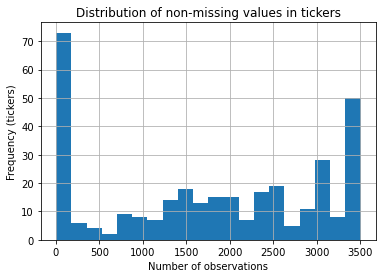

There are 0 tickers with full data available.


In [10]:
import matplotlib.pyplot as plt

# histogram of the number of non-missing values
ax = df_close.notna().sum().hist(bins=20)
plt.xlabel("Number of observations")
plt.ylabel("Frequency (tickers)")
plt.axis("tight")
plt.title("Distribution of non-missing values in tickers")
plt.show()

print("There are {} tickers with full data available.".format(df_close.columns[(df_close.notna().sum() == df_close.shape[0]).values].shape[0]))


In [11]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 590141 entries, 2020-11-02 to 2020-12-25
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    590141 non-null  float64
 1   high    590141 non-null  float64
 2   low     590141 non-null  float64
 3   close   590141 non-null  float64
 4   volume  590141 non-null  int64  
 5   ticker  590141 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 31.5+ MB


In [12]:
# Find composite indexes. They can be identified by 0 volume.
non_comp_indexes = df_volume.columns[(df_volume.sum() != 0).values].values

# filter the dataframes
df_open = df_open[non_comp_indexes] # open
df_high = df_high[non_comp_indexes] # high
df_low = df_low[non_comp_indexes] # low
df_close = df_close[non_comp_indexes] # close
df_volume = df_volume[non_comp_indexes] # volume
df_ftr_rtn = df_ftr_rtn[non_comp_indexes] # future return
df_rtn = df_rtn[non_comp_indexes] # return
df_hl = df_hl[non_comp_indexes] # high/low

In [13]:
# get the array of tickers with less more than 800 non-missing values
tickers_good = df_close.columns[(df_close.notna().sum() >= 800).values]

# filter the dataframes
df_open = df_open[tickers_good] # open
df_high = df_high[tickers_good] # high
df_low = df_low[tickers_good] # low
df_close = df_close[tickers_good] # close
df_volume = df_volume[tickers_good] # volume
df_ftr_rtn = df_ftr_rtn[tickers_good] # future return
df_rtn = df_rtn[tickers_good] # return
df_hl = df_hl[tickers_good] # high/low

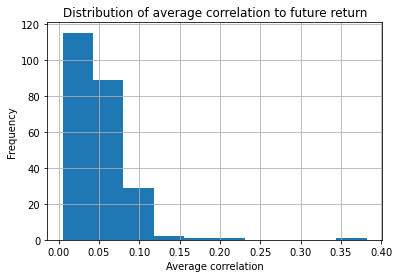

In [14]:
df_corr_score = pd.DataFrame()

# Loops over every ticker
for ticker in tickers_good:
    df = pd.concat([df_open[ticker], 
                    df_high[ticker], 
                    df_low[ticker], 
                    df_close[ticker], 
                    df_volume[ticker], 
                    df_ftr_rtn[ticker], 
                    df_rtn[ticker], 
                    df_hl[ticker]], 
                   axis=1, 
                   keys=["open", "high", "low", "close", "volume", "future_return", "return", "high_low"])
    df_corr_score = df_corr_score.append({"ticker": ticker, 
                                          "avg_corr": df.corr().drop("future_return", axis = 1).loc['future_return'].abs().mean()}, 
                                         ignore_index = True)

# draws the histogram of values of average correlation to future return
df_corr_score.avg_corr.hist();
plt.xlabel("Average correlation")
plt.ylabel("Frequency")
plt.title("Distribution of average correlation to future return")
plt.show()

In [15]:
# get all ticker more than 75th percentile in average correlation
tickers_75 = df_corr_score[df_corr_score.avg_corr > df_corr_score.avg_corr.quantile(0.75)].ticker.values

# filter the dataframes
df_open = df_open[tickers_75] # open
df_high = df_high[tickers_75] # high
df_low = df_low[tickers_75] # low
df_close = df_close[tickers_75] # close
df_volume = df_volume[tickers_75] # volume
df_ftr_rtn = df_ftr_rtn[tickers_75] # future return
df_rtn = df_rtn[tickers_75] # return
df_hl = df_hl[tickers_75] # high/low

In [16]:
# modify original dataframes
df_close = df_close.fillna(method="ffill") # close
df_close = df_close.fillna(method="bfill") # to handle the first row of close
df_volume = df_volume.applymap(lambda x: 0 if pd.isna(x) is True else x) # volume
df_open = df_open.fillna(df_close) # open
df_high = df_high.fillna(df_close) # high
df_low = df_low.fillna(df_close) # low

# calculate other dataframes
df_ftr_rtn = (df_close.shift(-1) / df_close) - 1 # future return
df_rtn = (df_close / df_close.shift(1)) - 1 # return
df_hl = df_high / df_low # high/low

In [17]:
import ta # import package

# mfi dataframe
df_mfi = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate mfi
    temp = ta.volume.money_flow_index(high=df_high[ticker], 
                                        low=df_low[ticker], 
                                        close=df_close[ticker], 
                                        volume=df_volume[ticker],
                                        fillna=True)
    # concatenate with main dataframe
    df_mfi = pd.concat([df_mfi, temp], axis=1)

# rename the columns
df_mfi.columns = df_close.columns

In [18]:
# ema dataframe
df_ema = df_close.apply(ta.trend.ema_indicator, fillna=True)

In [19]:
# rsi dataframe
df_rsi = df_close.apply(ta.momentum.rsi, fillna=True)

In [20]:
# stoch_k and stoch_d dataframe
df_stoch_k = pd.DataFrame()
df_stoch_d = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate %k
    temp = ta.momentum.stoch(high=df_high[ticker],
                             low=df_low[ticker],
                             close=df_close[ticker],
                             fillna=True)
    # concatenate with main dataframe
    df_stoch_k = pd.concat([df_stoch_k, temp], axis=1)
    
    # calculate %d
    temp = ta.momentum.stoch_signal(high=df_high[ticker],
                                   low=df_low[ticker],
                                   close=df_close[ticker],
                                   fillna=True)
    # concatenate with main dataframe
    df_stoch_d = pd.concat([df_stoch_d, temp], axis=1)

# rename the columns
df_stoch_k.columns = df_close.columns
df_stoch_d.columns = df_close.columns

In [21]:
# macd dataframe
df_macd = df_close.apply(ta.trend.macd_diff, fillna=True)

In [22]:
# william_r dataframe
df_will_r = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate william_r
    temp = ta.momentum.wr(high=df_high[ticker],
                          low=df_low[ticker],
                          close=df_close[ticker],
                          fillna=True)
    # concatenate with main dataframe
    df_will_r = pd.concat([df_will_r, temp], axis=1)

# rename the columns
df_will_r.columns = df_close.columns

In [23]:

# cci dataframe
df_cci = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate cci
    temp = ta.trend.cci(high=df_high[ticker],
                        low=df_low[ticker],
                        close=df_close[ticker],
                        fillna=True)
    # concatenate with main dataframe
    df_cci = pd.concat([df_cci, temp], axis=1)

# rename the columns
df_cci.columns = df_close.columns

In [24]:

# ichi_a and ichi_b dataframe
df_ichi_a = pd.DataFrame()
df_ichi_b = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate ichi_a
    temp = ta.trend.ichimoku_a(high=df_high[ticker],
                               low=df_low[ticker],
                              fillna=True)
    # concatenate with main dataframe
    df_ichi_a = pd.concat([df_ichi_a, temp], axis=1)
    
    # calculate ichi_b
    temp = ta.trend.ichimoku_b(high=df_high[ticker],
                               low=df_low[ticker],
                              fillna=True)
    # concatenate with main dataframe
    df_ichi_b = pd.concat([df_ichi_b, temp], axis=1)

# rename the columns
df_ichi_a.columns = df_close.columns

In [25]:
# A/D dataframe
df_ad = pd.DataFrame()

# loop over all tickers
for ticker in df_close.columns:
    # calculate cci
    temp = ta.volume.acc_dist_index(high=df_high[ticker],
                                    low=df_low[ticker],
                                    close=df_close[ticker],
                                    volume=df_volume[ticker],
                                    fillna=True
                                   )
    # concatenate with main dataframe
    df_ad = pd.concat([df_ad, temp], axis=1)

# rename the columns
df_ad.columns = df_close.columns

In [26]:
# Calculate upper and lower band
df_bb_up = df_close.apply(ta.volatility.bollinger_hband, fillna=True)
df_bb_down = df_close.apply(ta.volatility.bollinger_lband, fillna=True)

In [27]:
# list all the dataframes of interest
dfois = [df_open, df_high, df_low, df_close,df_volume, df_rtn, df_hl,
         df_mfi, df_ema, df_rsi, df_stoch_k, df_stoch_d, df_macd, df_will_r, df_cci,
         df_ichi_a, df_ichi_b, df_ad, df_bb_up, df_bb_down, df_ftr_rtn]
dfois_str = ['open', 'high', 'low', 'close', 'volume', 'rtn', 'hl','mfi', 'ema', 'rsi', 'stoch_k', 'stoch_d', 'macd', 
             'will_r', 'cci', 'ichi_a', 'ichi_b', 'ad', 'bb_up', 'bb_down', 'ftr_rtn']

# remove dates prior to 2015-02-01 and the date 2018-06-29
[df.drop(df.iloc[df.index < pd.to_datetime('2015-02-01')].index, inplace=True) for df in dfois];
[df.drop(df.iloc[df.index == '2018-06-29'].index, inplace=True) for df in dfois];

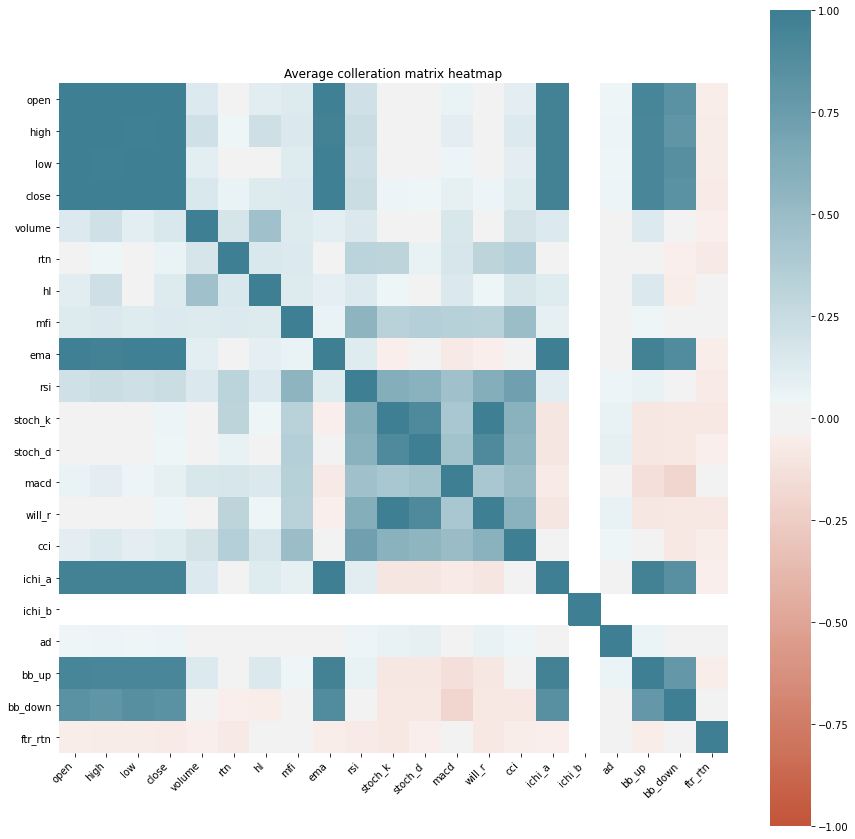

In [28]:
import seaborn as sns
# initialise numpy array
corr_val = np.empty([len(dfois),len(dfois)])

# loop over every dataframe and find correlation
for i, df1 in enumerate(dfois):
    for j, df2 in enumerate(dfois):
        corr_val[i][j] = df1.corrwith(df2).mean()
    
# visualise the correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(15,15))
df_corr = pd.DataFrame(corr_val, columns=dfois_str, index=dfois_str)

# draw heatmap using seaborn - better visualisation
sns.heatmap(
    df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=500),
    square=True,
    ax=ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

ax.set_title('Average colleration matrix heatmap');

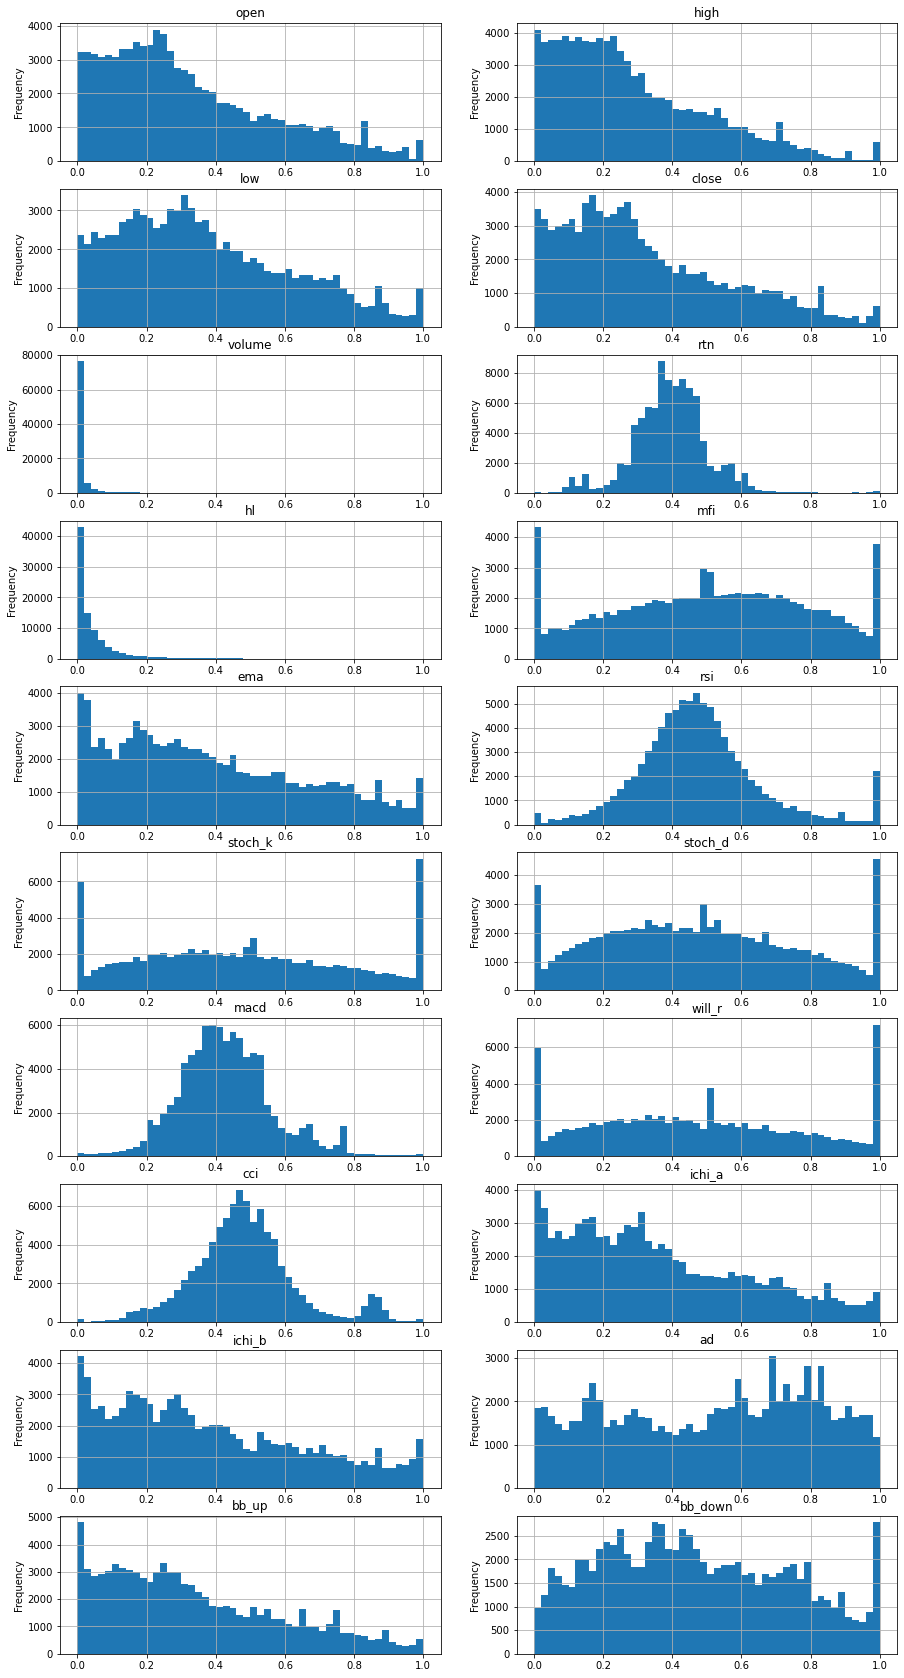

In [29]:
from sklearn import preprocessing

# normalise and draw subplots for each feature
fig, axs = plt.subplots(10,2, figsize=(15, 30))   
for i, ax in enumerate(axs.flatten()):
    if i >= 20:
        pass
    else:
        nomaliser = preprocessing.MinMaxScaler(feature_range=(0,1))
        df_val = nomaliser.fit_transform(dfois[i])
        ax.hist(df_val.reshape(df_val.shape[0]*df_val.shape[1]), bins=50)
        ax.set_title(dfois_str[i])
        ax.set_ylabel('Frequency')
        ax.grid()

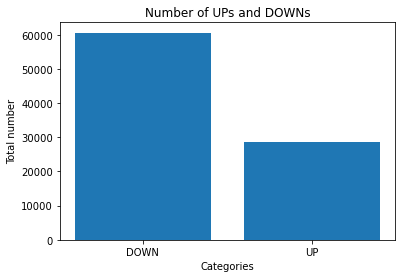

In [30]:
# Create target dataframe
df_target = (df_ftr_rtn > 0).astype(int)

# Look at the proportion
values, counts = np.unique(df_target.values.reshape(df_target.shape[0]*df_target.shape[1]), return_counts=True)
plt.bar(values,counts,tick_label=['DOWN','UP'])
plt.title('Number of UPs and DOWNs')
plt.ylabel('Total number')
plt.xlabel('Categories')
plt.show()


In [56]:
# list all the dataframes of interest
#dfois = [df_close, df_rtn, df_ema, df_rsi, df_stoch_k, df_stoch_d, df_macd, df_cci,
#         df_ichi_a, df_ichi_b, df_bb_up, df_bb_down, df_target]
#dfois_str = ['close', 'rtn', 'ema', 'rsi', 'stoch_k', 'stoch_d', 'macd', 'cci',
#         'ichi_a', 'ichi_b', 'bb_up', 'bb_down', 'target']

dfois = [df_close, df_rtn, df_ema, df_rsi, df_stoch_k, df_stoch_d, df_macd, df_cci,
         df_ichi_a, df_bb_up, df_bb_down, df_target]
dfois_str = ['close', 'rtn', 'ema', 'rsi', 'stoch_k', 'stoch_d', 'macd', 'cci',
         'ichi_a',  'bb_up', 'bb_down', 'target']

In [57]:
# split all dataframes into test, training, and evaluation sets
# train set
dfois_train = []
for df in dfois:
    dfois_train.append(df.iloc[df.index < pd.to_datetime('2017-07-01')])

# test set
dfois_test = []
for df in dfois:
    dfois_test.append(df.iloc[df.index >= pd.to_datetime('2019-01-01')])

# validation set
dfois_eval = []
for df in dfois:
    dfois_eval.append(df.iloc[(df.index >= pd.to_datetime('2017-07-01')) & (df.index < pd.to_datetime('2019-01-01'))])

In [58]:
# list of normalisers corresponding to each dataframe
nomalisers = []

for i, df in enumerate(dfois[:-1]):
    # create the normaliser object
    nomalisers.append(preprocessing.MinMaxScaler(feature_range=(0,1)))
    
    # columns and indexes
    columns = dfois_train[i].columns
    index_train = dfois_train[i].index
    index_test = dfois_test[i].index
    index_eval = dfois_eval[i].index
    
    # fit normalise
    nomalisers[i].fit(dfois_train[i])
    
    # trasform
    train_data = nomalisers[i].transform(dfois_train[i])
    eval_data = nomalisers[i].transform(dfois_eval[i])
    test_data = nomalisers[i].transform(dfois_test[i])
    
    # replace list
    dfois_train[i] = pd.DataFrame(train_data, columns=columns, index=index_train)
    dfois_eval[i] = pd.DataFrame(eval_data, columns=columns, index=index_eval)
    dfois_test[i] = pd.DataFrame(test_data, columns=columns, index=index_test)

In [59]:
# list of scalers corresponding to each dataframe
scalers = []

# standardise the data by fitting the train set
for i, _ in enumerate(dfois[:-1]):
    # create the Scaler object
    scalers.append(preprocessing.StandardScaler())
    
    # columns and indexes
    columns = dfois_train[i].columns
    index_train = dfois_train[i].index
    index_test = dfois_test[i].index
    index_eval = dfois_eval[i].index
    
    # fit scale
    flat_arr = dfois_train[i].values.reshape(dfois_train[i].shape[0]*dfois_train[i].shape[1],1)
    scalers[i].fit(np.tile(flat_arr, dfois_train[i].shape[1]))
    
    # trasform
    train_data = scalers[i].transform(dfois_train[i])
    eval_data = scalers[i].transform(dfois_eval[i])
    test_data = scalers[i].transform(dfois_test[i])
    
    # replace list
    dfois_train[i] = pd.DataFrame(train_data, columns=columns, index=index_train)
    dfois_eval[i] = pd.DataFrame(eval_data, columns=columns, index=index_eval)
    dfois_test[i] = pd.DataFrame(test_data, columns=columns, index=index_test)

In [60]:
# arrange sequential_data
from collections import deque
import random

# look at the past 60 days
SEQ_LEN = 60

def sequence_data(df_list, shuffle=True):
    # list containing the data
    sequential_data = []

    for ticker in df_close.columns:
        # initialise dataframe
        df_ticker = pd.DataFrame()

        # concatenate the dataframes
        for df in df_list:
            df_ticker = pd.concat([df_ticker, df[ticker]], axis=1)

        prev_days = deque(maxlen=SEQ_LEN)
        # for values in every row
        for i in df_ticker.values: 
            # remove the targets
            prev_days.append([n for n in i[:-1]])  
            # append when sequence length is reached
            if len(prev_days) == SEQ_LEN: 
                sequential_data.append([np.array(prev_days), i[-1]])
                
        # shuffle - we do not need to do this for test set
        if shuffle == True:
            random.shuffle(sequential_data)

    return sequential_data

In [61]:

# sequence all data sets
sequential_data_train = sequence_data(dfois_train)
sequential_data_eval = sequence_data(dfois_eval)
sequential_data_test = sequence_data(dfois_test, shuffle=False) # do not shuffle just this one

# print the length
print('Training data length: {}'.format(len(sequential_data_train)))
print('Validation data length: {}'.format(len(sequential_data_eval)))
print('Testing data length: {}'.format(len(sequential_data_test)))

Training data length: 32820
Validation data length: 19440
Testing data length: 26400


In [62]:

# balance train and evaluation data
def balance_data(sequential_data):
    ups = [] 
    downs = [] 
    
    # separate the sequence into ups and downs
    for seq, target in sequential_data:
        if target == 0:
            downs.append([seq, target])
        elif target == 1:
            ups.append([seq, target])
    
    # shuffle to randomise
    random.shuffle(ups)
    random.shuffle(downs)
    
    # get the shorter length
    lower = min(len(ups), len(downs))
    
    # truncate the list to shorter length
    ups = ups[:lower]
    downs = downs[:lower]
    
    # merge and shuffle
    sequential_data = ups+downs
    random.shuffle(sequential_data)
    
    return sequential_data

In [63]:

# separate train and target data
def separate_data(sequential_data):
    X = []
    y = []
    
    # loop over every row in sequential data
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)

    return np.array(X), y

In [64]:

# perform balancing by calling the function
train_x, train_y = separate_data(balance_data(sequential_data_train))
validation_x, validation_y = separate_data(balance_data(sequential_data_eval))

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint

# batch size and epochs
BATCH_SIZE = 64
EPOCHS = 40

# build LSTM prediction model
model = Sequential()

model.add(LSTM(128, input_shape=(train_x.shape[1:]), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

# Model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           71680     
_________________________________________________________________
dropout (Dropout)            (None, 60, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 128)           512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 128)           512       
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               1

In [67]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
validation_x = np.asarray(validation_x)
validation_y = np.asarray(validation_y)

history = model.fit(train_x, train_y,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(validation_x, validation_y))

Train on 17642 samples, validate on 11770 samples
Epoch 1/40
17642/17642 [==============================] - 60s 3ms/sample - loss: 0.7442 - accuracy: 0.5371 - val_loss: nan - val_accuracy: 0.5263
Epoch 2/40
17642/17642 [==============================] - 58s 3ms/sample - loss: 0.6849 - accuracy: 0.5537 - val_loss: nan - val_accuracy: 0.5334
Epoch 3/40
17642/17642 [==============================] - 58s 3ms/sample - loss: 0.6683 - accuracy: 0.5680 - val_loss: nan - val_accuracy: 0.5340
Epoch 4/40
17642/17642 [==============================] - 58s 3ms/sample - loss: 0.6591 - accuracy: 0.5838 - val_loss: nan - val_accuracy: 0.5522
Epoch 5/40
17642/17642 [==============================] - 57s 3ms/sample - loss: 0.6551 - accuracy: 0.5954 - val_loss: nan - val_accuracy: 0.5460
Epoch 6/40
17642/17642 [==============================] - 57s 3ms/sample - loss: 0.6486 - accuracy: 0.6036 - val_loss: nan - val_accuracy: 0.5453
Epoch 7/40
17642/17642 [==============================] - 57s 3ms/sample -

In [68]:
# save the model
model.save("model.h5")

In [69]:
# load the model
model = load_model("model.h5")

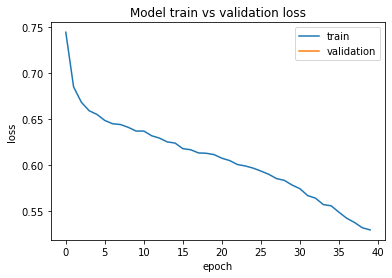

In [70]:
# plot the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [72]:

from sklearn.metrics import classification_report

test_x = np.asarray(test_x)
test_y = np.asarray(test_y)
# test performance using test set
test_x, test_y = separate_data(sequential_data_test)

# get the prediction
pred = model.predict_classes(test_x)

# get prediction probability
pred_proba = model.predict(test_x)

# accuracy using test
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('')

# classification report
print('Classification report:')
print(classification_report(test_y, pred))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'numpy.float64'>"})

In [73]:
# build index list
pred_index = dfois_test[0].index[dfois_test[0].index >= dfois_test[0].head(60).index[-1]]

# build prediction dataframe - 1 is BUY and 0 is SELL
df_pred = pd.DataFrame(pred.reshape(dfois_test[0].shape[0]-SEQ_LEN+1,dfois_test[0].shape[1], order='F'),
                       index = pred_index,
                       columns = dfois_test[0].columns)

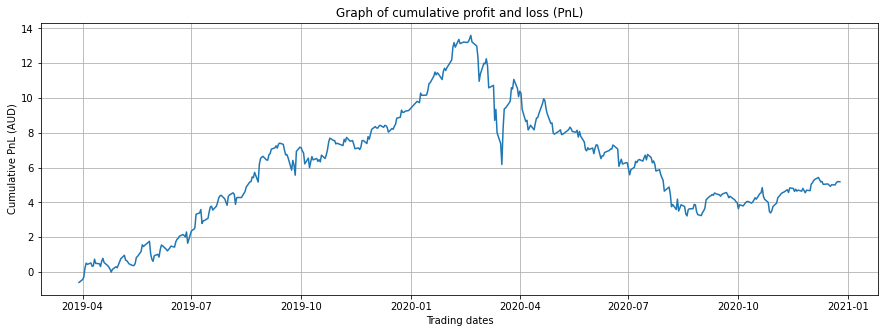

In [74]:
# dataframe for right prediction - 1 is CORRECT and 0 is WRONG
df_right = (df_pred.astype(bool) == df_target.loc[pred_index].astype(bool)).astype(int)

# dataframe for wrong prediction - 1 is WRONG and 0 is CORRECT
df_wrong = (~df_right.astype(bool)).astype(int)

# datframe for profit
df_profit = df_right*df_ftr_rtn.loc[pred_index].abs()

# dataframe for loss
df_loss = df_wrong*df_ftr_rtn.loc[pred_index].abs()

plt.subplots(figsize=(15,5))
plt.plot((df_profit.sum(axis=1) - df_loss.sum(axis=1)).cumsum())
plt.grid()
plt.xlabel('Trading dates')
plt.ylabel('Cumulative PnL (AUD)')
plt.title('Graph of cumulative profit and loss (PnL)')
plt.show()

In [92]:
# initialise dataframe
df_master_std = pd.DataFrame()

# loop over every dataframe of interest for train and evaluation
for i, df in enumerate(dfois_train):    
    # temporary dataframe
    df_temp = pd.concat([dfois_train[i],dfois_eval[i],dfois_test[i]])
    df_temp = df_temp.reset_index()
    df_temp.columns = ['date'] + df_temp.columns[1:].tolist()
    df_temp = df_temp.melt(id_vars='date', var_name='ticker', value_name=dfois_str[i])
    df_temp.date = pd.to_datetime(df_temp.date)
    
    # set the index
    df_temp.set_index(['date'], inplace=True)
    
    # concatenate on index
    df_master_std = pd.concat([df_master_std,df_temp], axis=1).drop('ticker', axis=1)

# add future return into the dataframe
df_temp = df_ftr_rtn.copy()
df_temp.reset_index(inplace=True)
df_temp = df_temp.melt(id_vars='date', var_name='ticker', value_name='ftr_rtn')
df_temp.date = pd.to_datetime(df_temp.date)
df_temp.set_index(['date'], inplace=True)
df_master_std = pd.concat([df_master_std,df_temp], axis=1, join='inner').drop('ticker', axis=1)

ValueError: Shape of passed values is (5353260, 6), indices imply (89280, 6)

In [115]:
df_master_std = pd.concat([df_master_std,df_temp], axis=1)

ValueError: Shape of passed values is (5353260, 6), indices imply (89280, 6)

ValueError: cannot reindex from a duplicate axis

In [94]:
# import the random forest class
from sklearn.ensemble import RandomForestClassifier

# create rf classifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_x, train_y)

ValueError: Found array with dim 3. Estimator expected <= 2.